In [141]:
#****************************Useful Resouces****************************************
#https://builtin.com/data-science/correlation-matrix
#https://www.atlassian.com/data/charts/heatmap-complete-guide
#https://statisticsbyjim.com/hypothesis-testing/bootstrapping/
#https://www.jwilber.me/permutationtest/
#https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/
#https://diamondage.com/what-does-it-mean-to-fit-a-model-anyway/
#https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples
#https://youtu.be/-7U10N8PvlQ?si=z80VKLG8urCU-OeA

In [142]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [143]:
caHousing = pd.read_csv("housing.csv")

In [144]:
# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object
def collist(df):
    mylist =[]
    for i in df.columns: 
        if df[i].dtype != 'object':
           mylist.append(i)
    return mylist

columns_list = collist(caHousing)

In [145]:
#Find the type of a data element in Python
type(columns_list)

list

In [146]:
#Find the shape of a dataframe
caHousing.shape

(20640, 10)

In [147]:
#Find the schema of a dataframe
caHousing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [148]:
#Find unique values in the column of a dataframe
uniqueval = caHousing['ocean_proximity'].unique()

In [149]:
#Find the count of unique values
caHousing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [150]:
caHousing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [151]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
caHousing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [152]:
# Verify which features have missing values
caHousing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [153]:
# Calculate the % of missing data
caHousing['total_bedrooms'].isnull().sum()/caHousing.shape[0] *100

1.002906976744186

In [154]:
#Copying a dataframe
caHousing_copy=caHousing.copy()

(array([   5.,    7.,    9.,   15.,   65.,  140.,  291.,  345.,  401.,
         420.,  323.,  484.,  543.,  547.,  454.,  440.,  532.,  466.,
         430.,  450.,  594.,  512.,  514.,  601.,  676.,  489.,  489.,
         499.,  528.,  439.,  350.,  301.,  382.,  403.,  432.,  374.,
         334.,  336.,  279.,  259.,  259.,  287.,  307.,  222.,  209.,
         191.,  141.,  153.,  134.,  131.,  150.,  152.,  168.,  157.,
         143.,  204.,  114.,  122.,  103.,   96.,   85.,   70.,   81.,
          81.,   53.,   73.,   66.,   52.,   55.,   58.,   48.,   74.,
          44.,   34.,   27.,   39.,   27.,   34.,   24., 1014.]),
 array([ 14999.   ,  21061.525,  27124.05 ,  33186.575,  39249.1  ,
         45311.625,  51374.15 ,  57436.675,  63499.2  ,  69561.725,
         75624.25 ,  81686.775,  87749.3  ,  93811.825,  99874.35 ,
        105936.875, 111999.4  , 118061.925, 124124.45 , 130186.975,
        136249.5  , 142312.025, 148374.55 , 154437.075, 160499.6  ,
        166562.125, 172624

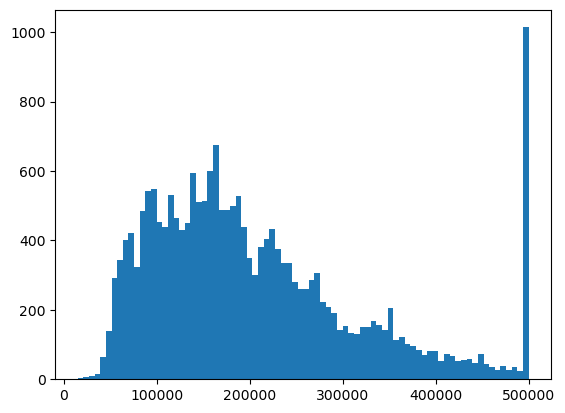

In [155]:
#To plot a histogram of one column in a dataframe
plt.hist(caHousing['median_house_value'],bins=80)

In [156]:
# Deleting a column in a dataframe
housingdfwithoutop = caHousing.drop(columns = 'ocean_proximity')


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

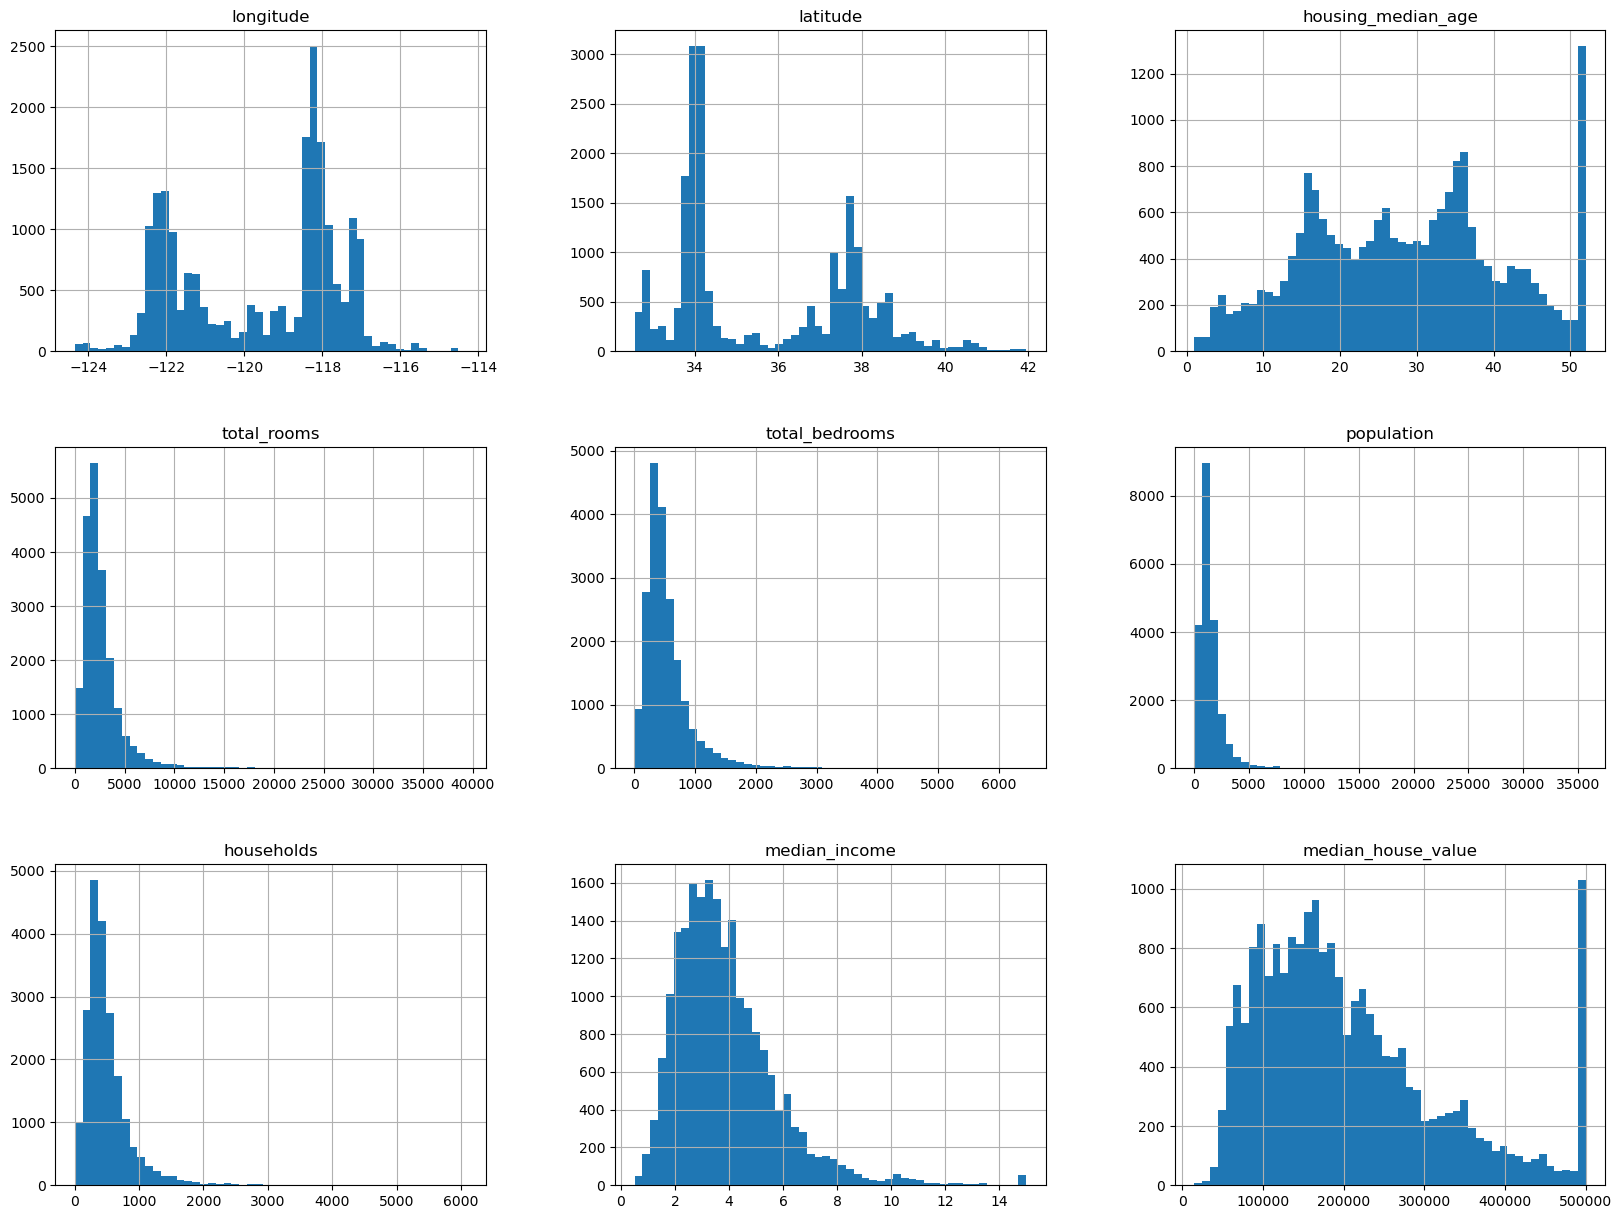

In [157]:
# Plot histograms of all numberic columns in a dataframe. Does not seem to work without bins and flgssize. If used on datafames with non-numeric columns, 
# plots histogram only with numeric columns
caHousing.hist(bins=50, figsize=(20,15))

## Use imputation to handle missing data #

In [159]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
caHousing_temp = caHousing.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
def collist(df):
    mylist =[]
    for i in df.columns: 
        if df[i].dtype != 'object':
           mylist.append(i)
    return mylist

columns_list = collist(caHousing)

# extract columns that contain at least one missing value
new_column_list = [col for col in caHousing_temp.loc[:, caHousing_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
caHousing_temp = caHousing_temp[new_column_list]

###  Impute missing data using machine learning #

In [182]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(caHousing_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(caHousing_temp)

# convert the array values to a dataframe with the appropriate column names
caHousing_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [184]:
# confirm there are no columns with missing values
caHousing_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [186]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    caHousing[column_name] = caHousing_temp.replace(caHousing[column_name],caHousing[column_name])

# confirm columns no longer contain null data
caHousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Correlation ID and Heatmap

In [188]:
#Correlation Matrix Implementation in Python
#If there are non-numeric columns in the data frame use corrMatrix = df.corr(numeric_only=True). Otherwise correlation matrix will be generated 
#with non-numeric column but you will not be able to generate a heatmap from the correlation matrix.
data = {'a':[45,37,42,35,39],
        'b':[38,31,26,28,33],
        'c':[10,15,17,21,12]}
#Creating a dataframe from a dictionary
df=pd.DataFrame(data,columns=['a','b','c'])
#Creating a correlation matrix
corrMatrix = df.corr()

In [189]:
corrMatrix

,a,b,c
a,1.000000,0.518457,-0.701886
b,0.518457,1.000000,-0.860941
c,-0.701886,-0.860941,1.000000


<Axes: >

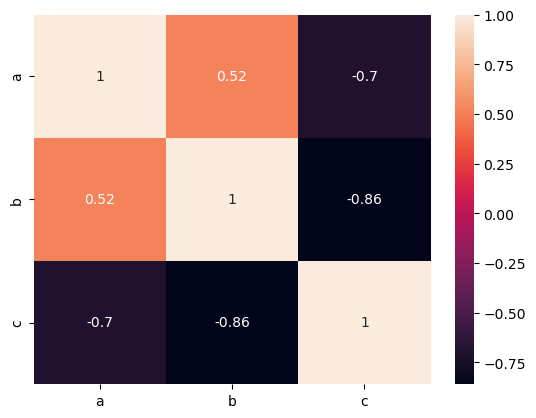

In [190]:
#Create a heatmap from the correlation matrix
sns.heatmap(corrMatrix,annot=True)

## Create a new column in a dataframe ##

In [192]:
caHousing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## Removing highly correlated features #


In [194]:
#  a new feature that is a ratio of the total rooms to households
caHousing['rooms_per_household'] = caHousing['total_rooms']/caHousing['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
caHousing['bedrooms_per_room'] = caHousing['total_bedrooms']/caHousing['total_rooms']

# a new feature that is a ratio of the population to the households 
caHousing['population_per_household']= caHousing['population']/caHousing['households']

# let's combine the latitude and longitude into 1
caHousing['coords'] = caHousing['longitude']/caHousing['latitude']

caHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  int64  
 3   total_rooms               20640 non-null  int64  
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  int64  
 6   households                20640 non-null  int64  
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  int64  
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [195]:
# remove total_rooms, households, total bedrooms, popluation, longitude, latitude
caHousing = caHousing.drop(columns='total_rooms')  
caHousing = caHousing.drop(columns='households')
caHousing = caHousing.drop(columns='total_bedrooms')
caHousing = caHousing.drop(columns='population')
caHousing = caHousing.drop(columns='longitude')
caHousing = caHousing.drop(columns='latitude')

caHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  int64  
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  int64  
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


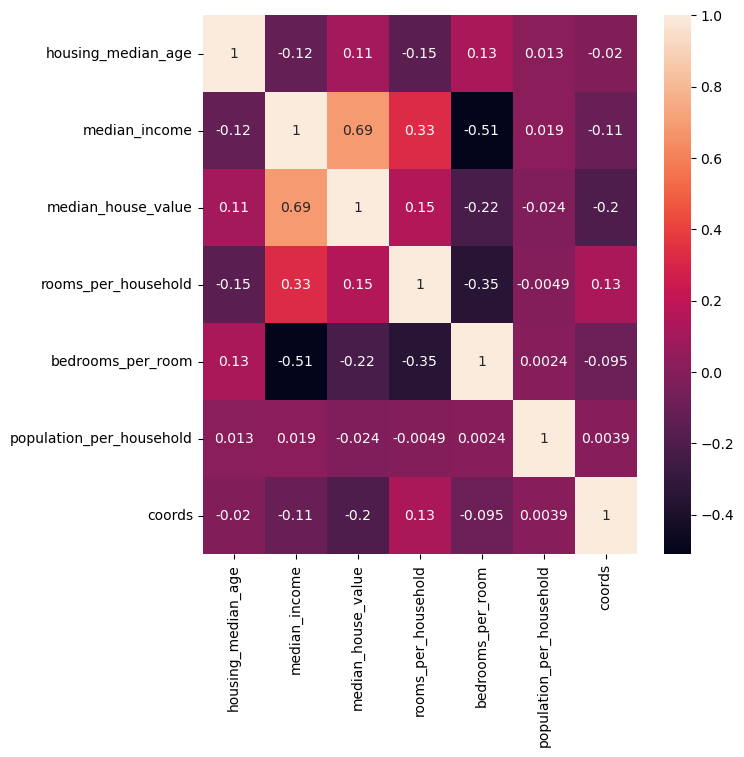

In [196]:
#heatmap after removing highly correlated features
corr = caHousing.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (7,7))

sns.heatmap(corr, annot=True)
plt.show()

## One Hot Encoding #

In [198]:
#pandas get_dummies function, takes in a column in a dataframe as the input and gives a dataframe as the output.# of columns in the dataframe is equal 
#to number of values in the column.Value of these columns would be true or false.
pd.get_dummies(caHousing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [199]:
#pandas get_dummies function directly applied to a dataframe. The original column name is prepended to the new column name along with the value
caHousing_encoded=pd.get_dummies(data=caHousing, columns=['ocean_proximity'])

In [200]:
caHousing_encoded

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,8.3252,452600,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21,8.3014,358500,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52,7.2574,352100,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52,5.6431,341300,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52,3.8462,342200,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1.5603,78100,5.045455,0.224625,2.560606,-3.067123,False,True,False,False,False
20636,18,2.5568,77100,6.114035,0.215208,3.122807,-3.069385,False,True,False,False,False
20637,17,1.7000,92300,5.205543,0.215173,2.325635,-3.074309,False,True,False,False,False
20638,18,1.8672,84700,5.329513,0.219892,2.123209,-3.076845,False,True,False,False,False


## Cleaning Column Names #

In [202]:
# write a function to remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
# each element in mindx is a string and string functions are used
#caHousing_encoded.columns outputs an object similar to a list containing all the column names.

def clncolnames(mindx):
    mylist =[]
    for i in caHousing_encoded.columns: 
#string functions used
        j=i.lower().replace(' ', '_').replace('<', '_')
        mylist.append(j)
    return mylist

caHousing_encoded.columns = clncolnames(caHousing_encoded.columns)

## Train the model #

In [204]:
caHousing_encoded.dtypes

housing_median_age              int64
median_income                 float64
median_house_value              int64
rooms_per_household           float64
bedrooms_per_room             float64
population_per_household      float64
coords                        float64
ocean_proximity__1h_ocean        bool
ocean_proximity_inland           bool
ocean_proximity_island           bool
ocean_proximity_near_bay         bool
ocean_proximity_near_ocean       bool
dtype: object

In [205]:
## Split target variable and feature variables. X here is a dataframe and y is a series
X = caHousing_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = caHousing_encoded['median_house_value']

In [206]:
type(X)

pandas.core.frame.DataFrame

In [207]:
X.dtypes

housing_median_age              int64
median_income                 float64
bedrooms_per_room             float64
population_per_household      float64
coords                        float64
ocean_proximity__1h_ocean        bool
ocean_proximity_inland           bool
ocean_proximity_island           bool
ocean_proximity_near_bay         bool
ocean_proximity_near_ocean       bool
dtype: object

In [208]:
type(y)

pandas.core.series.Series

In [209]:
y


0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

### Split training and test data #

In [211]:
import sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%. Here we specify test_size. train_size also can be specified. If one of
# them is not specified then it will be taken as complementary of the other. If both are none, test_size is set to .25 by default
# X -> array with the inputs; y -> array of the outputs ; X and y should have the same length
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


## Linear Regression Model Training #

In [213]:
# Use scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [214]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

In [236]:
y_pred_test

array([103743.0508965 ,  92451.25093188, 219490.96384448, ...,
       216609.96294968, 127975.07292308, 202803.25431034])

In [250]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700,103743.050896
3024,45800,92451.250932
15663,500001,219490.963844
20484,218600,283292.425471
9814,278000,244228.861575
...,...,...
17505,237500,210121.340663
13512,67300,74907.098235
10842,218400,216609.962950
16559,119400,127975.072923


In [252]:
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

In [254]:
r2_reg_model_test

0.56